In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# Notebook description

Notebook to make preliminary plots of the HFSE abundaces measured in the CV chondrites. The notebook uses two seperate datasets collected in 2019 and 2022. All of the data was collected using the LA-ICP-MS at Rutgers University. The meteorites analyzed include:
- Vigps1B
- Vigps2B
- Leops2B
- Alps1
- Alps6
- Alps9

# Read in data

## Chondrite abundances

In [88]:
# Read the CSV file containing chondrite abundances
chondrite_abundances = pd.read_csv('Abunds_allnew_13jun2023.csv')

# Set the 'Element' column as the index of chondrite_abundances DataFrame
chondrite_abundances = chondrite_abundances.set_index('Element')

# Access the CI (Carbonaceous Chondrite) column from chondrite_abundances DataFrame
CI = chondrite_abundances.CI

## 2019 data

In [89]:
# Read the CSV files for data from 2019 (SQ, Ca, Si, and Mg)
data_2019_sq = pd.read_csv('2019_LA_CVdata_SQ_input.csv')
data_2019_ca = pd.read_csv('2019_LA_CVdata_Ca_input.csv')
data_2019_si = pd.read_csv('2019_LA_CVdata_Si_input.csv')
data_2019_mg = pd.read_csv('2019_LA_CVdata_Mg_input.csv')

In [90]:
# Create a list of DataFrame names
data_2019 = ['data_2019_sq', 'data_2019_ca', 'data_2019_si', 'data_2019_mg']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_2019:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [91]:
# Add a new column 'Tm/Lu' and 'Pr/Er' to identify type II clasts for each DataFrame in data_2019
for dname in data_2019:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## 2022 data

In [92]:
# Read the CSV files for data from 2022 (SQ, Ca, Si, Mg, and Al)
data_2022_sq = pd.read_csv('2022_June_SQ_input2.csv')
data_2022_ca = pd.read_csv('2022_June_Ca_input2.csv')
data_2022_si = pd.read_csv('2022_June_Si_input2.csv')
data_2022_mg = pd.read_csv('2022_June_Mg_input2.csv')
data_2022_al = pd.read_csv('2022_June_Al_input2.csv')

In [93]:
# Create a list of DataFrame names
data_2022 = ['data_2022_sq', 'data_2022_ca', 'data_2022_si', 'data_2022_mg', 'data_2022_al']

# Iterate over each DataFrame in the data_2022 list
for dataframe_name in data_2022:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [94]:
# Add a new column 'Tm/Lu' to identify type II clasts for each DataFrame in data_2022
for dname in data_2022:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## group II patterns (manually identified)

In [95]:
groupII_forsure = pd.read_csv("group2_forsure.csv")
groupII_maybe = pd.read_csv("group2_maybe.csv")
groupII_both = pd.concat([groupII_forsure, groupII_maybe])

# Functions

In [96]:
def remove_outliers(data, threshold=3.5):
    """
    Removes outliers from a given data series using the modified Z-score method.

    Parameters:
        data (pandas.Series): The data series from which outliers are to be removed.
        threshold (float, optional): The threshold value to determine outliers. Defaults to 3.5.

    Returns:
        pandas.Series: The data series with outliers removed.

    """

    data_copy = data.copy()  # Make a copy of the data Series

    len_all = len(data_copy)
    len_nan = data_copy.isnull().sum()

    # Check if there is more than one non-null value to calculate outliers
    if (len_all != 0) and (len_all != len_nan) and (len_nan != (len_all - 1)):
        median = np.nanmedian(data_copy)
        mad = np.nanmedian(np.abs(data_copy - median))
        modified_z_scores = 0.6745 * (data_copy - median) / mad  # 0.6745 is a scaling factor for asymptotic consistency

        outliers = np.abs(modified_z_scores) > threshold
        data_copy[outliers] = np.nan

    return data_copy


In [97]:
def clip_nans(array):
    # Create an empty list to store the clipped array
    clipped_array = []

    # Iterate over each element in the array
    for element in array:
        # Check if the element is not a NaN
        if isinstance(element, str) or not np.isnan(element):
            # Add the element to the clipped array
            clipped_array.append(element)

    return clipped_array

In [193]:
import pandas as pd
import numpy as np

def sub_df(pd_df, meteorite='all', obj='all', spots='all', phase='all', element='all', comp='all', dtype='mean', array='on', rmv_out='on', group='off', CI_norm='off'):
    """
    Returns a subset of a pandas DataFrame based on specified filters.

    Parameters:
        pd_df (pandas.DataFrame): The original DataFrame to filter.
        meteorite (str, optional): The meteorite name to filter. Defaults to 'all'.
        obj (str, optional): The object name to filter. Defaults to 'all'.
        spots (str or list, optional): The spot number(s) to filter. Defaults to 'all'.
        phase (str, optional): The phase name to filter. Defaults to 'all'.
        element (str or list, optional): The element(s) to filter. Defaults to 'all'.
        comp (str, optional): The component name to filter. Defaults to 'all'.
        dtype (str, optional): The data type to filter. Defaults to 'mean'.
        array (str, optional): Whether to return an array or DataFrame. Defaults to 'on'.
        rmv_out (str, optional): Whether to remove outliers. Defaults to 'on'.
        group (str, optional): The group to filter. Defaults to 'off'.
        CI_norm (str, optional): Whether to normalize ratios by CI values. Defaults to 'off'.

    Returns:
        pandas.DataFrame or pandas.Series: The filtered subset of the original DataFrame.

    """

    # Note: can only grab one object and one phase

    if (meteorite != 'all'):
        # Filter by meteorite name
        df = pd_df[pd_df.Met_Name == meteorite]

        if obj != 'all' and spots == 'all':
            # Filter by object name
            df = pd_df[(pd_df.Met_Name == meteorite) & (pd_df.Object == obj)]

        if obj != 'all' and spots != 'all':
            # Filter by object name and spot number(s)
            df = pd_df[(pd_df.Met_Name == meteorite) & (pd_df.Object == obj) & (pd_df.Spot_Num == spots[0])]
            if len(spots) > 1:
                for i in range(1, len(spots)):
                    df_spot = pd_df[(pd_df.Met_Name == meteorite) & (pd_df.Object == obj) & (pd_df.Spot_Num == spots[i])]
                    df = pd.concat([df, df_spot])

    if (meteorite == 'all'):
        # If meteorite is 'all', include all data
        df = pd_df

    if (phase != 'all'):
        # Filter by phase name
        df = df[df.Phase == phase]

    if (comp != 'all'):
        # Filter by component name
        comp_types = df.Component.unique()
        comp_types = clip_nans(comp_types)
        comp_grab = []
        
        for x in comp_types:
            if comp in x:
                comp_grab = np.append(comp_grab, x)
        
        if len(comp_grab) == 0:
            df = pd.DataFrame(columns=df.columns.values)
               
        if len(comp_grab) == 1:
            df = df[df.Component == comp_grab[0]]
        if len(comp_grab) == 2:
            df = df[(df.Component == comp_grab[0]) | (df.Component == comp_grab[1])]
        
    if (group == 'II'):
        # Filter by group
        df = df[(df['Tm/Lu'] > 1.5) & (df['Pr/Er'] > 1.5)]

    if (element != 'all'):
        col_names = df.columns.values
        col_grab = ['LA_Name']
        if array == 'on':
            col_grab = []

        if element == 'REE':
            element = ['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']

        if element == 'HFSE':
            element = ['Zr', 'Hf', 'Nb', 'Ta']

        if element == 'Zr/Hf':
            data_names = df[['LA_Name', 'Met_Name', 'Object', 'Spot_Num', 'Phase', 'Component', 'Tm/Lu', 'Pr/Er']]

            if col_names[-1] == 'Zr/Hf':
                df = df.loc[:, 'Zr/Hf'].clip(lower=0).replace(0, np.nan)

            if col_names[-1] != 'Zr/Hf':
                for x in col_names:

                    if ('Zr' in x) and ('ppm' in x) and (dtype in x):
                        col_grab = x
                    if ('Hf' in x) and ('ppm' in x) and (dtype in x):
                        col_grab = np.append(col_grab, x)
                
                #for option between dividing by CI or not 
                zr_ci, hf_ci = 1, 1
                if CI_norm == 'on': #if ci norm is turned on, will divide by CI values, not just 1
                    zr_ci, hf_ci = CI.Zr, CI.Hf
                
                df = df.loc[:, col_grab].clip(lower=0).replace(0, np.nan)
                df['Zr/Hf'] = df.apply(lambda row: (row[-2]/zr_ci) / (row[-1]/hf_ci), axis=1)
            
            df = df.reset_index()
            data_names = data_names.reset_index()
            df = data_names.merge(df, left_index=True, right_index=True)

            if array == 'on':
                df = df['Zr/Hf']

        if element == 'Nb/Ta':
            data_names = df[['LA_Name', 'Met_Name', 'Object', 'Spot_Num', 'Phase', 'Component', 'Tm/Lu', 'Pr/Er']]

            if col_names[-1] == 'Nb/Ta':
                df = df.loc[:, 'Nb/Ta']

            if col_names[-1] != 'Nb/Ta':
                for x in col_names:
                    if ('Nb' in x) and ('ppm' in x) and (dtype in x):
                        nb = x
                    if ('Ta' in x) and ('ppm' in x) and (dtype in x):
                        ta = x
                        
                #for option between dividing by CI or not
                nb_ci, ta_ci = 1, 1
                if CI_norm == 'on':  #if ci norm is turned on, will divide by CI values, not just 1
                    nb_ci, ta_ci = CI.Nb, CI.Ta

                df = df.loc[:, [nb, ta]].clip(lower=0).replace(0, np.nan)  # Using .loc to assign values and clipping negative values to NaN
                df['Nb/Ta'] = df.apply(lambda row: (row[-2]/nb_ci) / (row[-1]/ta_ci), axis=1)
            
            df = df.reset_index()
            data_names = data_names.reset_index()
            df = data_names.merge(df, left_index=True, right_index=True)

            if array == 'on':
                df = df['Nb/Ta']

        if element == 'Tm/Lu':
            data_names = df['LA_Name']
            df = df['Tm/Lu']
            df = pd.concat([data_names, df], axis=1)

            if array == 'on':
                df = df['Tm/Lu']

        if element != 'Zr/Hf' and element != 'Nb/Ta' and element != 'Tm/Lu':

            for i in range(0, len(element)):
                for x in col_names:
                    if (element[i] in x) and ('ppm' in x) and (dtype in x):
                        col_grab = np.append(col_grab, x)

            df = df[col_grab]
            if array == 'on':
                df[df < 0] = np.nan

        if rmv_out == 'on' and array == 'on':
            df = remove_outliers(df)

        if rmv_out == 'on' and array == 'off':
            last_col = df.iloc[:, -1]
            df.iloc[:, -1] = remove_outliers(last_col)

    return df


In [194]:
#Test out function
x = sub_df(data_2022_sq, meteorite='Alps6', element='Nb/Ta', array='off')
x

,index_x,LA_Name,Met_Name,Object,Spot_Num,Phase,Component,Tm/Lu,Pr/Er,index_y,Nb93_ppm_mean,Ta181_ppm_mean,Nb/Ta
0,223,Alps6_c13_1,Alps6,c13,1.0,gls,chondrule,0.995869,1.302976,223,2.091093,0.115578,18.092454
1,224,Alps6_c13_2,Alps6,c13,2.0,opx,chondrule,0.522227,1.945337,224,0.511994,0.014170,36.133296
2,225,Alps6_c13_3,Alps6,c13,3.0,gls,chondrule,1.006418,1.037335,225,3.543596,0.160780,22.040066
3,226,Alps6_c13_4,Alps6,c13,4.0,olv,chondrule,0.554651,0.189941,226,0.016814,NaN,NaN
4,227,Alps6_c13_8,Alps6,c13,8.0,gls,chondrule,1.092259,1.103482,227,3.985378,0.215262,18.514056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,392,Alps6_c24_2,Alps6,c24,2.0,olv,chondrule,0.714608,0.011801,392,0.005474,NaN,NaN
74,393,Alps6_c24_3,Alps6,c24,3.0,olv,chondrule,0.779960,0.189396,393,0.005795,NaN,NaN
75,394,Alps6_c32_5,Alps6,c32,5.0,olv,chondrule,0.414227,0.998501,394,0.046292,0.002932,15.786766
76,395,Alps6_c40_1,Alps6,c40,1.0,olv,chondrule,0.680188,0.558208,395,0.035039,0.001020,34.341810


# gathering subset of data for plotting

Internal standardization:
- olv = mg
- aoa = si
- cpx = si
- gls = ca
- opx = mg
- cai = ca
- matrix = ca

In [14]:
phases  = data_2019_sq.Phase.unique()[6:] #all the phases included in the datasets
int_std = ['mg', 'si', 'si', 'ca', 'mg', 'ca', 'ca'] #the internal standards I'd like to use for each phase

In [15]:
#dataframes for ratio data
zrhf = pd.DataFrame() 
nbta = pd.DataFrame()

#arrays for ppm data 
zr_ppm = []
hf_ppm = []
nb_ppm = []
ta_ppm = []

for i in range(0, len(phases)):
    
    d2019 = 'data_2019_' + int_std[i] #grabbing 2019 dataframes with appropriate int std 
    d2022 = 'data_2022_' + int_std[i] #grabbing 2022 dataframes with appropriate int std 
    
    #compilling the all the data with the right int std for each phase
    zrhf = pd.concat([zrhf, 
                      sub_df(globals()[d2019], element='Zr/Hf', array='off', phase=phases[i], rmv_out='off'),
                     sub_df(globals()[d2022], element='Zr/Hf', array='off', phase=phases[i], rmv_out='off')])
    
    nbta = pd.concat([nbta, 
                      sub_df(globals()[d2019], element='Nb/Ta', array='off', phase=phases[i], rmv_out='off'),
                     sub_df(globals()[d2022], element='Nb/Ta', array='off', phase=phases[i], rmv_out='off')])
    
    

#once the data is compiled I remove all the outlier data
zrhf['Zr/Hf'] = remove_outliers(zrhf['Zr/Hf'])
nbta['Nb/Ta'] = remove_outliers(nbta['Nb/Ta'])

# plot (color=phase, marker=meteorite)

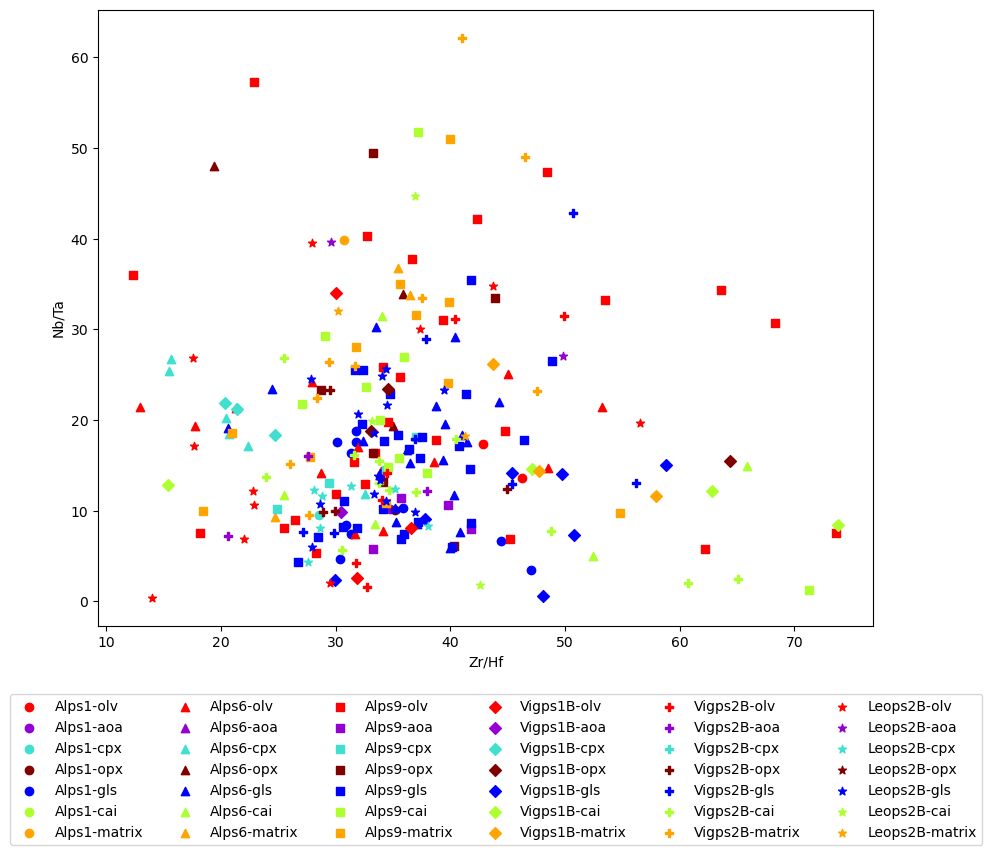

In [51]:
#plotting

#what I want to look at:
meteorites = ['Alps1', 'Alps6', 'Alps9', 'Vigps1B', 'Vigps2B', 'Leops2B']
phases     = ['olv', 'aoa', 'cpx', 'opx', 'gls', 'cai', 'matrix']

#arrays for plotting
met_shape = ['o', '^', 's', 'D', 'P', '*']
phs_color = ['red', 'darkviolet', 'turquoise', 'maroon', 'blue', 'greenyellow', 'orange']

#setting up plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')


#plotting loop
met_i = 0
for met in meteorites:
    phs_i = 0
    for phs in phases:
       
        #grabbing data
        zrhf_plot = sub_df(zrhf, meteorite=met, phase=phs, element='Zr/Hf', rmv_out='off')
        nbta_plot = sub_df(nbta, meteorite=met, phase=phs, element='Nb/Ta', rmv_out='off')
        
        #plotting
        ax.scatter(zrhf_plot, nbta_plot, color=phs_color[phs_i], marker=met_shape[met_i], label=met+'-'+phs, )
                           
        phs_i+=1
    met_i+=1
    
ax.legend(bbox_to_anchor=(1.15, -0.1), ncols=6);


/tmp/ipykernel_333/1206251490.py:27: RuntimeWarning: Mean of empty slice
  zrhf_plot = np.nanmean(sub_df(zrhf, meteorite=met, phase=phs, element='Zr/Hf', rmv_out='off'))
/tmp/ipykernel_333/1206251490.py:28: RuntimeWarning: Mean of empty slice
  nbta_plot = np.nanmean(sub_df(nbta, meteorite=met, phase=phs, element='Nb/Ta', rmv_out='off'))
/tmp/ipykernel_333/1206251490.py:27: RuntimeWarning: Mean of empty slice
  zrhf_plot = np.nanmean(sub_df(zrhf, meteorite=met, phase=phs, element='Zr/Hf', rmv_out='off'))
/tmp/ipykernel_333/1206251490.py:28: RuntimeWarning: Mean of empty slice
  nbta_plot = np.nanmean(sub_df(nbta, meteorite=met, phase=phs, element='Nb/Ta', rmv_out='off'))
/tmp/ipykernel_333/1206251490.py:27: RuntimeWarning: Mean of empty slice
  zrhf_plot = np.nanmean(sub_df(zrhf, meteorite=met, phase=phs, element='Zr/Hf', rmv_out='off'))
/tmp/ipykernel_333/1206251490.py:28: RuntimeWarning: Mean of empty slice
  nbta_plot = np.nanmean(sub_df(nbta, meteorite=met, phase=phs, element='Nb/T

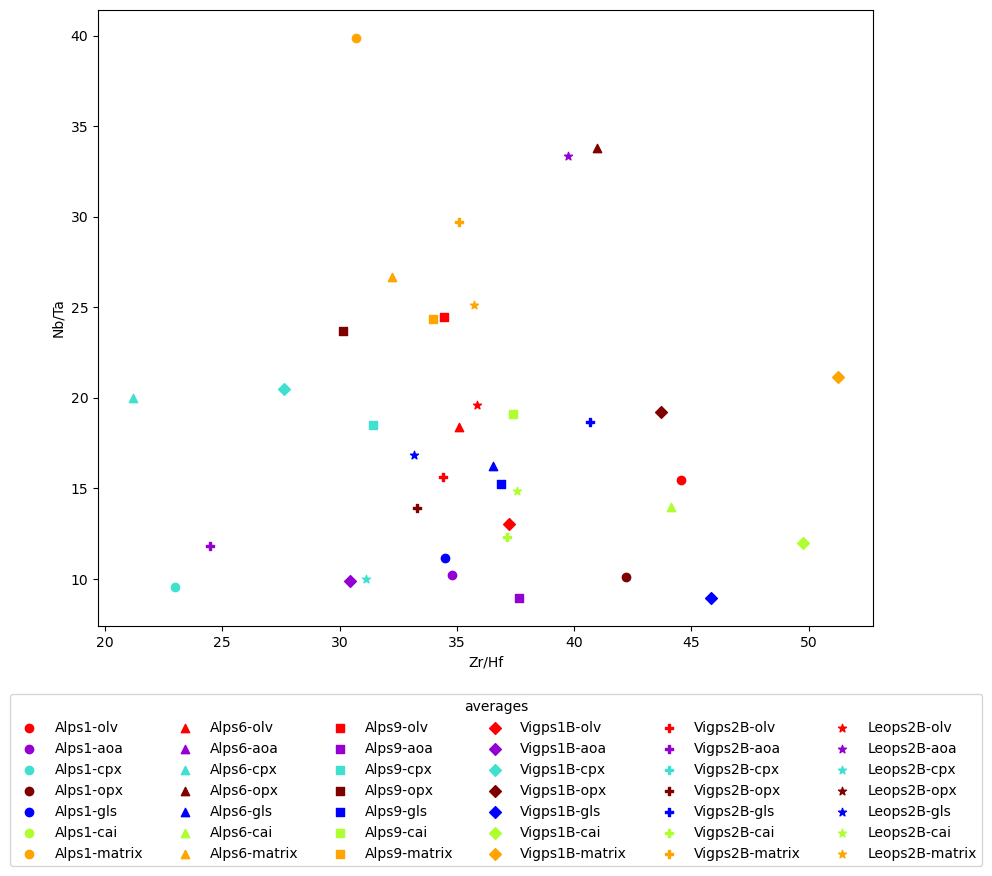

In [80]:
#plotting

#what I want to look at:
meteorites = ['Alps1', 'Alps6', 'Alps9', 'Vigps1B', 'Vigps2B', 'Leops2B']
phases     = ['olv', 'aoa', 'cpx', 'opx', 'gls', 'cai', 'matrix']

#arrays for plotting
met_shape = ['o', '^', 's', 'D', 'P', '*']
phs_color = ['red', 'darkviolet', 'turquoise', 'maroon', 'blue', 'greenyellow', 'orange']

#setting up plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')


#zrhf = pd.concat([sub_df(data_2019, element='Zr/Hf', array='off'), sub_df(data_2022, element='Zr/Hf', array='off')])
#nbta = pd.concat([sub_df(data_2019, element='Nb/Ta', array='off'), sub_df(data_2022, element='Nb/Ta', array='off')])

#plotting loop
met_i = 0
for met in meteorites:
    phs_i = 0
    for phs in phases:
       
        #grabbing data
        zrhf_plot = np.nanmean(sub_df(zrhf, meteorite=met, phase=phs, element='Zr/Hf', rmv_out='off'))
        nbta_plot = np.nanmean(sub_df(nbta, meteorite=met, phase=phs, element='Nb/Ta', rmv_out='off'))
        
        #plotting
        ax.scatter(zrhf_plot, nbta_plot, color=phs_color[phs_i], marker=met_shape[met_i], label=met+'-'+phs)
                           
        phs_i+=1
    met_i+=1
    
ax.legend(bbox_to_anchor=(1.15, -0.1), ncols=6, title='averages');


# plot (color=component, marker=meteorite)

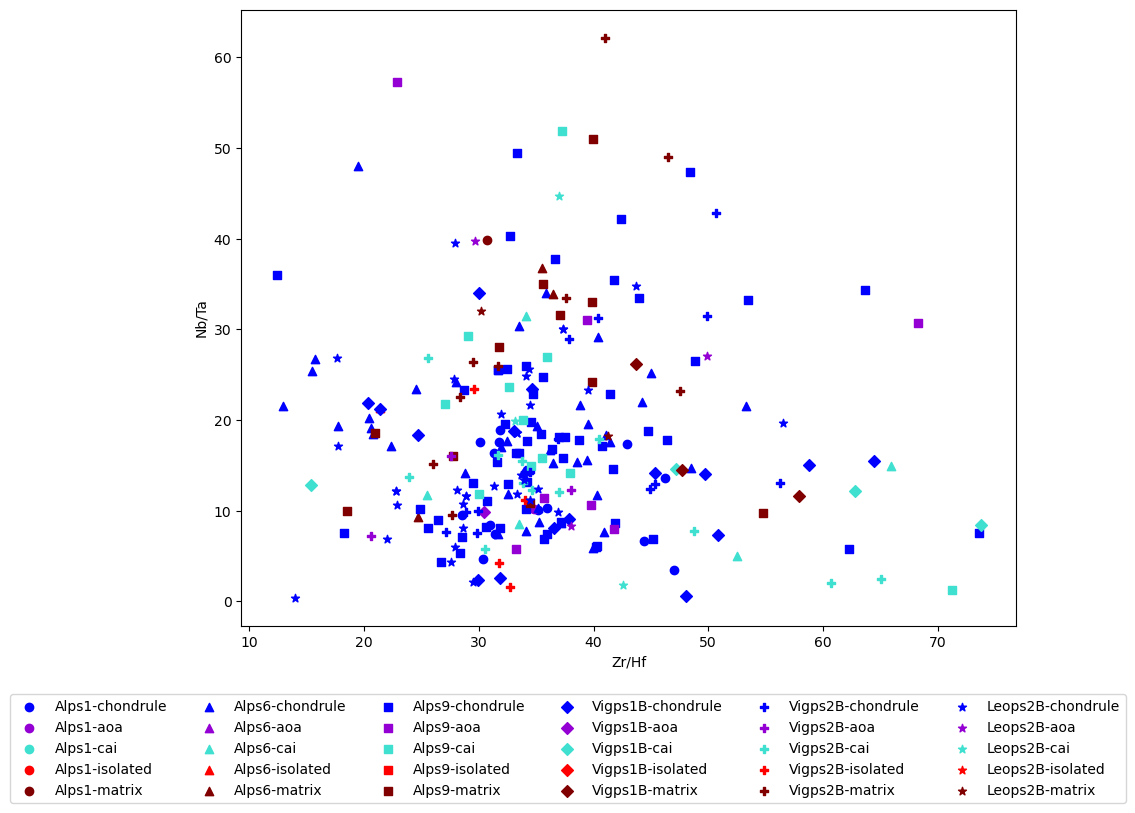

In [18]:
#plotting

#what I want to look at:
meteorites = ['Alps1', 'Alps6', 'Alps9', 'Vigps1B', 'Vigps2B', 'Leops2B']
components = ['chondrule', 'aoa', 'cai', 'isolated', 'matrix']

#arrays for plotting
met_shape = ['o', '^', 's', 'D', 'P', '*']
cmp_color = ['blue', 'darkviolet', 'turquoise', 'red', 'maroon']

#setting up plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting loop
met_i = 0
for met in meteorites:
    cmp_i = 0
    for cmp in components:
        
        #grabbing data
        zrhf_plot = sub_df(zrhf, meteorite=met, comp=cmp, element='Zr/Hf', rmv_out='off')
        nbta_plot = sub_df(nbta, meteorite=met, comp=cmp, element='Nb/Ta', rmv_out='off')
        
        #plotting
        ax.scatter(zrhf_plot, nbta_plot, color=cmp_color[cmp_i], marker=met_shape[met_i], label=met+'-'+cmp)
        
        cmp_i+=1
    met_i+=1

ax.legend(bbox_to_anchor=(1.15, -0.1), ncols=6);

# plot (color=meteorite)

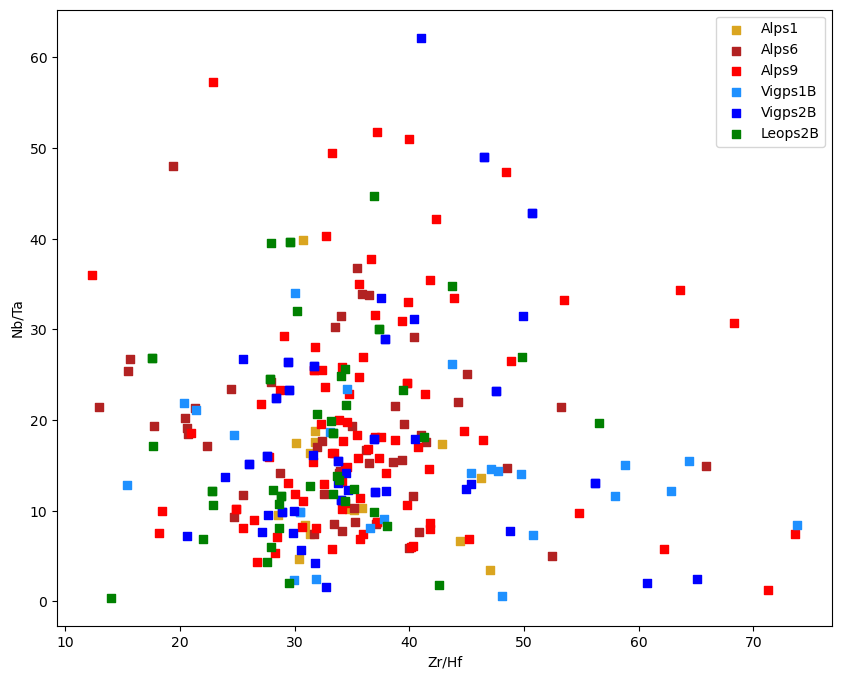

In [19]:
#what I want to look at:
meteorites = ['Alps1', 'Alps6', 'Alps9', 'Vigps1B', 'Vigps2B', 'Leops2B']

#arrays for plotting
met_color = ['goldenrod', 'firebrick', 'red', 'dodgerblue', 'blue', 'green']

#setting up plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting loop
met_i = 0
for met in meteorites:
    
    #grabbing data
    zrhf_plot = sub_df(zrhf, meteorite=met, element='Zr/Hf', rmv_out='off')
    nbta_plot = sub_df(nbta, meteorite=met, element='Nb/Ta', rmv_out='off')

    #plotting
    ax.scatter(zrhf_plot, nbta_plot, color=met_color[met_i], marker='s', label=met)
        
    met_i+=1

ax.legend();

# plot (average ratios by phase & by component)

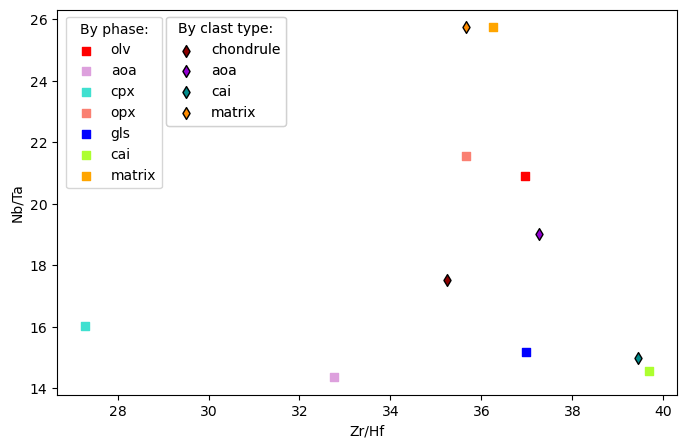

In [20]:
#plotting

#what I want to look at:
components = ['chondrule', 'aoa', 'cai', 'isolated', 'matrix']
clasts = ['chondrule', 'aoa', 'cai', 'matrix']
phases = ['olv', 'aoa', 'cpx', 'opx', 'gls', 'cai', 'matrix']

#arrays for plotting
clst_color= ['darkred', 'darkviolet', 'darkcyan', 'darkorange']
phs_color = ['red', 'plum', 'turquoise', 'salmon', 'blue', 'greenyellow', 'orange']

#setting up plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting loop for phases
phs_handles = []
phs_i = 0
for phs in phases:
    #grabbing data
    zrhf_plot = sub_df(zrhf, phase=phs, element='Zr/Hf', rmv_out='off')
    nbta_plot = sub_df(nbta, phase=phs, element='Nb/Ta', rmv_out='off')

    #calculating new averages
    zrhf_mean  = np.nanmean(zrhf_plot)
    nbta_mean  = np.nanmean(nbta_plot)
    
    #plotting
    phs_plot = ax.scatter(zrhf_mean, nbta_mean,  color=phs_color[phs_i], marker='s', label=phs)
    phs_handles.append(phs_plot)
    phs_i+=1
    
    
# Creating the legend for phases
legend1 = ax.legend(handles=phs_handles, title='By phase:', bbox_to_anchor=(0.18, 1))
ax.add_artist(legend1)

#plotting loop for clasts
clst_handles = []

clst_i = 0
for clst in clasts:

    #grabbing data
    zrhf_plot = sub_df(zrhf, comp=clst, element='Zr/Hf', rmv_out='off')
    nbta_plot = sub_df(nbta, comp=clst, element='Nb/Ta', rmv_out='off')

    #calculating new averages
    zrhf_mean  = np.nanmean(zrhf_plot)
    nbta_mean  = np.nanmean(nbta_plot)
    
    #plotting
    clst_plot = ax.scatter(zrhf_mean, nbta_mean, color=clst_color[clst_i], edgecolor='k', marker='d', label=clst)
    clst_handles.append(clst_plot)
    clst_i+=1
    
# Creating the legend for clasts
legend2 = ax.legend(handles=clst_handles, title='By clast type:', bbox_to_anchor=(0.38, 1))
ax.add_artist(legend2);

# plot (Zr ppm/Hf ppm vs Zr/Hf)

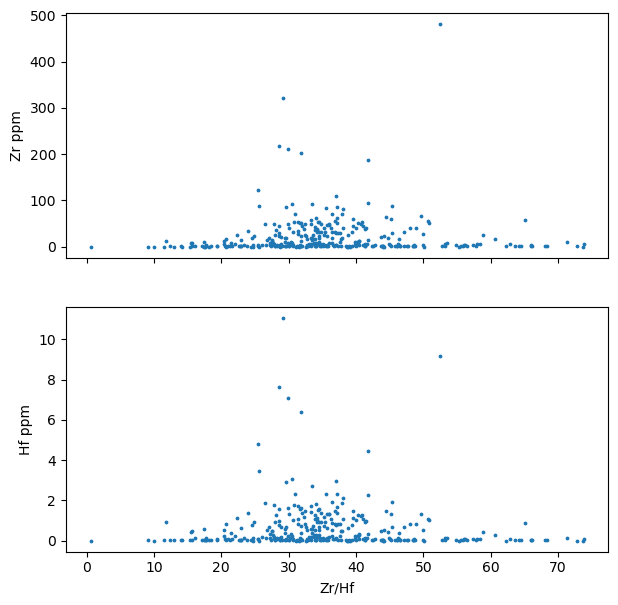

In [197]:
#ppm data for each element
zr_ppm = zrhf.Zr90_ppm_mean
hf_ppm = zrhf.Hf178_ppm_mean
zrhf_plot = zrhf['Zr/Hf']

#setting up the plot 
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
axs[0].set_ylabel('Zr ppm')
axs[1].set_ylabel('Hf ppm')
axs[1].set_xlabel('Zr/Hf')

#plotting
axs[0].scatter(zrhf_plot, zr_ppm, s=3)
axs[1].scatter(zrhf_plot, hf_ppm, s=3);

# plot (Nb ppm/Ta ppm vs Nb/Ta)

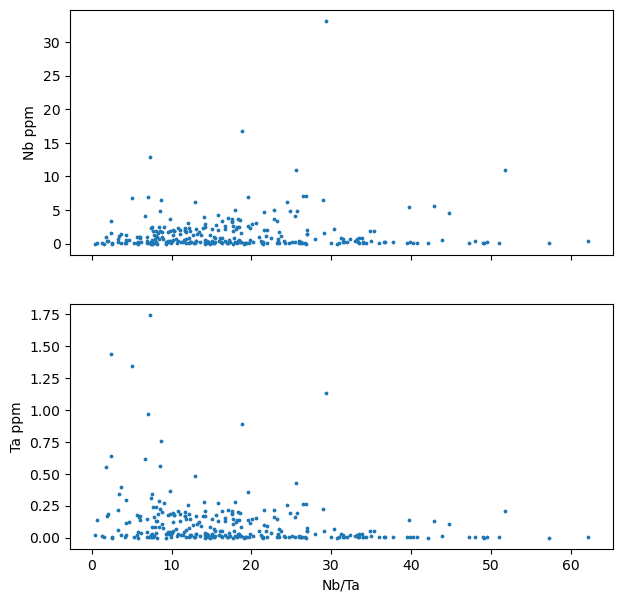

In [73]:
#ppm data for each element
nb_ppm = nbta.Nb93_ppm_mean
ta_ppm = nbta.Ta181_ppm_mean
nbta_plot = nbta['Nb/Ta']

#setting up the plot 
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
axs[0].set_ylabel('Nb ppm')
axs[1].set_ylabel('Ta ppm')
axs[1].set_xlabel('Nb/Ta')

#plotting
axs[0].scatter(nbta_plot, nb_ppm, s=3)
axs[1].scatter(nbta_plot, ta_ppm, s=3);

# plot (highlighting type II clasts)

In [51]:
#type II data
zrhf_II = sub_df(zrhf, element='Zr/Hf', group='II')
nbta_II = sub_df(nbta, element='Nb/Ta', group='II')

#non type II data
zrhf_non = sub_df(zrhf, element='Zr/Hf', array='on')
nbta_non = sub_df(nbta, element='Nb/Ta', array='on')

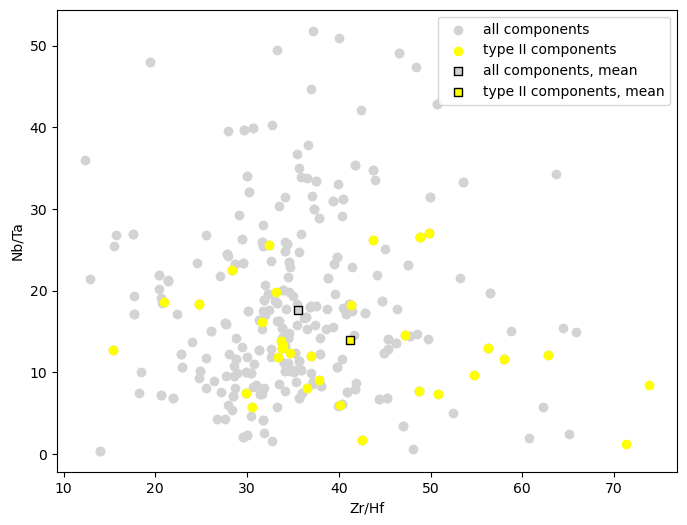

In [52]:
#setting up figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting
ax.scatter(zrhf_non, nbta_non, color='lightgrey', zorder=0, label='all components')
ax.scatter(zrhf_II, nbta_II, color='yellow', zorder=0, label='type II components')

ax.scatter(np.nanmean(zrhf_non), np.nanmean(nbta_non), color='lightgrey', zorder=1, label='all components, mean', marker='s', edgecolor='k')
ax.scatter(np.nanmean(zrhf_II), np.nanmean(nbta_II), color='yellow', zorder=1, label='type II components, mean', marker='s', edgecolor='k')

ax.legend();

In [23]:
#type II data
zrhf_II = sub_df(zrhf, element='Zr/Hf', comp='cai', group='II')
nbta_II = sub_df(nbta, element='Nb/Ta', comp='cai', group='II')

#non type II data
zrhf_non = sub_df(zrhf, element='Zr/Hf', comp='cai', array='on')
nbta_non = sub_df(nbta, element='Nb/Ta', comp='cai', array='on')

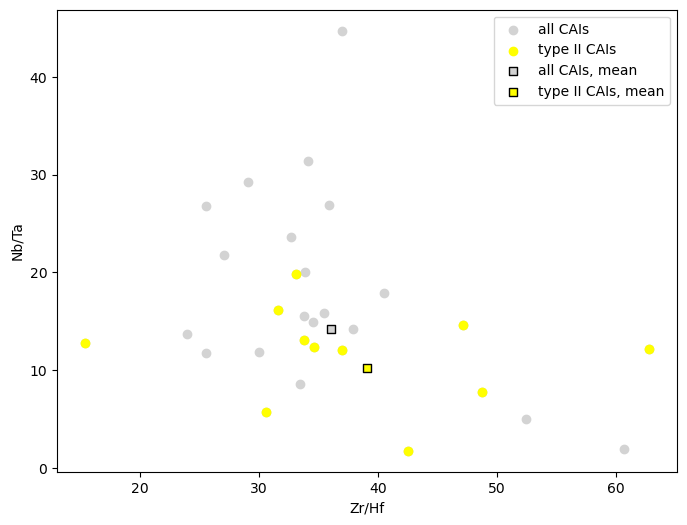

In [24]:
#setting up figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting
ax.scatter(zrhf_non, nbta_non, color='lightgrey', zorder=0, label='all CAIs')
ax.scatter(zrhf_II, nbta_II, color='yellow', zorder=1, label='type II CAIs')

ax.scatter(np.nanmean(zrhf_non), np.nanmean(nbta_non), color='lightgrey', zorder=1, label='all CAIs, mean', marker='s', edgecolor='k')
ax.scatter(np.nanmean(zrhf_II), np.nanmean(nbta_II), color='yellow', zorder=1, label='type II CAIs, mean', marker='s', edgecolor='k')

ax.legend();

# plot (highlighting group II, manual identification)

In [77]:
#collecting group II data
zrhf_II_man = []
nbta_II_man = []

for i in range(0, len(groupII_both.Met_Name)):
    
    zrhf_add = sub_df(zrhf, element='Zr/Hf', meteorite=groupII_both.Met_Name.iloc[i], obj=groupII_both.Object.iloc[i], spots=[groupII_both.Spot_Num.iloc[i]])
    nbta_add = sub_df(nbta, element='Nb/Ta', meteorite=groupII_both.Met_Name.iloc[i], obj=groupII_both.Object.iloc[i], spots=[groupII_both.Spot_Num.iloc[i]])
    
    zrhf_II_man = np.append(zrhf_II_man, zrhf_add)
    nbta_II_man = np.append(nbta_II_man, nbta_add)
    
#non type II data
zrhf_non = sub_df(zrhf, element='Zr/Hf', array='on')
nbta_non = sub_df(nbta, element='Nb/Ta', array='on')

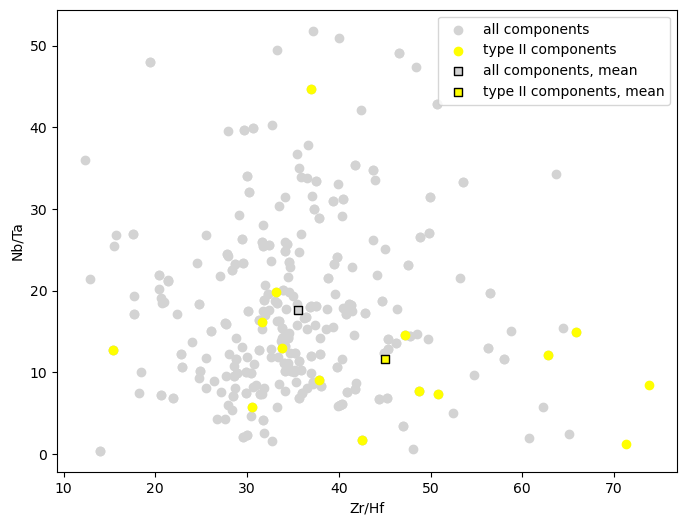

In [78]:
#setting up figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting
ax.scatter(zrhf_non, nbta_non, color='lightgrey', zorder=0, label='all components')
ax.scatter(zrhf_II_man, nbta_II_man, color='yellow', zorder=0, label='type II components')

ax.scatter(np.nanmean(zrhf_non), np.nanmean(nbta_non), color='lightgrey', zorder=1, label='all components, mean', marker='s', edgecolor='k')
ax.scatter(np.nanmean(zrhf_II_man), np.nanmean(nbta_II_man), color='yellow', zorder=1, label='type II components, mean', marker='s', edgecolor='k')

ax.legend();

In [79]:
#collecting group II data
zrhf_II_man = []
nbta_II_man = []

for i in range(0, len(groupII_both.Met_Name)):
    comp = sub_df(zrhf, element='Zr/Hf', meteorite=groupII_both.Met_Name.iloc[i], obj=groupII_both.Object.iloc[i], spots=[groupII_both.Spot_Num.iloc[i]], array='off').Component.values[0]
    if comp == 'cai':
        zrhf_add = sub_df(zrhf, element='Zr/Hf', meteorite=groupII_both.Met_Name.iloc[i], obj=groupII_both.Object.iloc[i], spots=[groupII_both.Spot_Num.iloc[i]])
        nbta_add = sub_df(nbta, element='Nb/Ta', meteorite=groupII_both.Met_Name.iloc[i], obj=groupII_both.Object.iloc[i], spots=[groupII_both.Spot_Num.iloc[i]])

        zrhf_II_man = np.append(zrhf_II_man, zrhf_add)
        nbta_II_man = np.append(nbta_II_man, nbta_add)
        
#non type II data
zrhf_non = sub_df(zrhf, element='Zr/Hf', comp='cai', array='on')
nbta_non = sub_df(nbta, element='Nb/Ta', comp='cai', array='on')

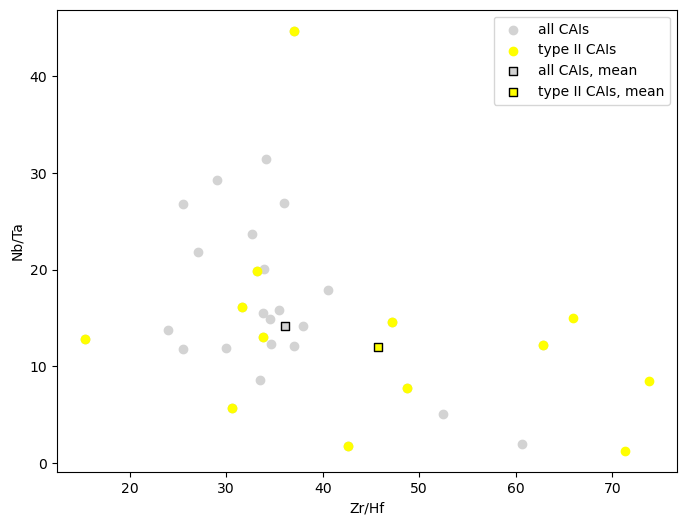

In [81]:
#setting up figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Zr/Hf')
ax.set_ylabel('Nb/Ta')

#plotting
ax.scatter(zrhf_non, nbta_non, color='lightgrey', zorder=0, label='all CAIs')
ax.scatter(zrhf_II_man, nbta_II_man, color='yellow', zorder=0, label='type II CAIs')

ax.scatter(np.nanmean(zrhf_non), np.nanmean(nbta_non), color='lightgrey', zorder=1, label='all CAIs, mean', marker='s', edgecolor='k')
ax.scatter(np.nanmean(zrhf_II_man), np.nanmean(nbta_II_man), color='yellow', zorder=1, label='type II CAIs, mean', marker='s', edgecolor='k')

ax.legend();